# Project - Bank Churn Prediction 
## Introduction

Welcome to the customer segmentation project for a banking dataset.<br>
In this project, we aim to develop a predictive model to identify customers who are likely to churn, i.e., close their accounts with the bank. <br>
This project is crucial for banks to proactively retain customers and minimize revenue loss due to churn. <br>


**Problem Statement** <br>
Customer churn, is a significant challenge for businesses in various industries, including banking.<br>
Losing customers can lead to reduced revenue and market share, highlighting the importance of accurately predicting and mitigating churn.<br>

_**The objective of this project is to predict whether a customer will continue with their account or close it (i.e., churn).**_ <br>

By accurately predicting churn, banks can implement targeted retention strategies to reduce customer attrition and enhance customer satisfaction.


**Dataset Description** <br>
The dataset contains information on bank customers, including those who have churned (Exited = 1) and those who continue to be customers (Exited = 0).<br>

**Key dataset specifications:** 165,034 rows & 14 columns

The dataset includes the following attributes:

| Attribute        | Description                                                   |
|:------------------|:---------------------------------------------------------------|
| id      | A unique identifier for each customer.                        |
| Surname          | The customer's surname or last name.                          |
| Credit Score     | A numerical value representing the customer's credit score.   |
| Geography        | The country where the customer resides (France, Spain, or Germany). |
| Gender           | The customer's gender (Male or Female).                       |
| Age              | The customer's age.                                           |
| Tenure           | The number of years the customer has been with the bank.      |
| Balance          | The customer's account balance.                               |
| NumOfProducts    | The number of bank products the customer uses (e.g., savings account, credit card). |
| HasCrCard        | Whether the customer has a credit card (1 = yes, 0 = no).     |
| IsActiveMember   | Whether the customer is an active member (1 = yes, 0 = no).   |
| EstimatedSalary  | The estimated salary of the customer.                         |
| Exited           | Whether the customer has churned (1 = yes, 0 = no).           |

**Type of ML task** <br>
This project involves **classification** using **supervised machine learning** as we have to **predict** whether a customer will churn or not based on the **given features**. 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report

## Loading the Dataset

In [2]:
df= pd.read_csv('./Data/Customer_info.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## Exploratory Data Analysis (EDA)

In this i am  performing **EDA and Data Wrangling concurrently**, So as to iteratively explore the data, identify data quality issues, and address them through preprocessing steps, ensuring that our analysis is based on clean and reliable data.


In [3]:
rows = df.shape[0]
column = df.shape[1]
print(f"Dataset has {rows} Rows and {column} Columns")
df.shape

Dataset has 165034 Rows and 14 Columns


(165034, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


**Insights:** <br>
   * No null values are there 
   * data types are also appropriate

In [5]:
df.duplicated().sum()

0

**Insight:** No duplicates are there

### Data Cleaning

**removing unnecessary Columns & setting the index**

In [6]:
df.drop(["CustomerId","Surname"],axis=1, inplace=True) 

In [7]:
df.set_index('id', inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Checking Outliers

**Summary Statistics**

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000



**Inferences**
 * **CreditScore** and **Age**  might have some outliers.
 * **Balance** is rightly skewed and could have outliers

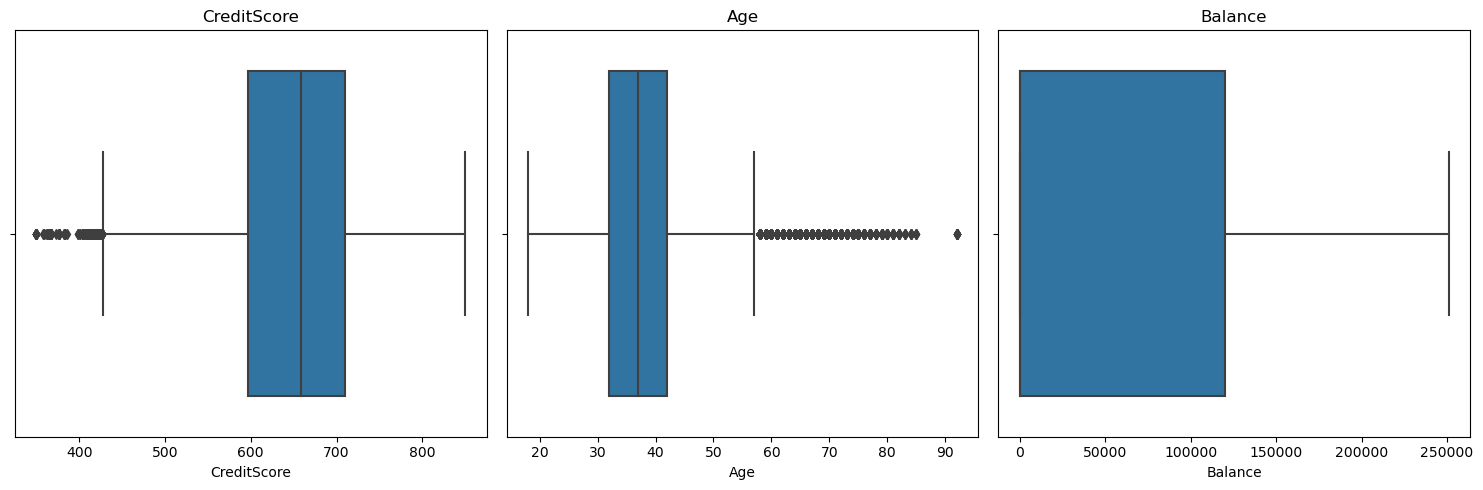

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#CreditScore
sns.boxplot(x=df['CreditScore'], ax=axes[0])
axes[0].set_title('CreditScore')

#Age
sns.boxplot(x=df['Age'], ax=axes[1])
axes[1].set_title('Age')

#Balance
sns.boxplot(x=df['Balance'], ax=axes[2])
axes[2].set_title('Balance')

plt.tight_layout()
plt.show()

**Handling outliers** <br>
* Low creditscore cannot be considered as outlier because this can be one of the parameter for our analysis.
* **Imputing values** above the 95th percentile with the value of the 95th percentile, thereby capping extreme values at the 95th percentile.

In [11]:
for column in ['CreditScore', 'Age', 'Balance']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

**ReChecking**

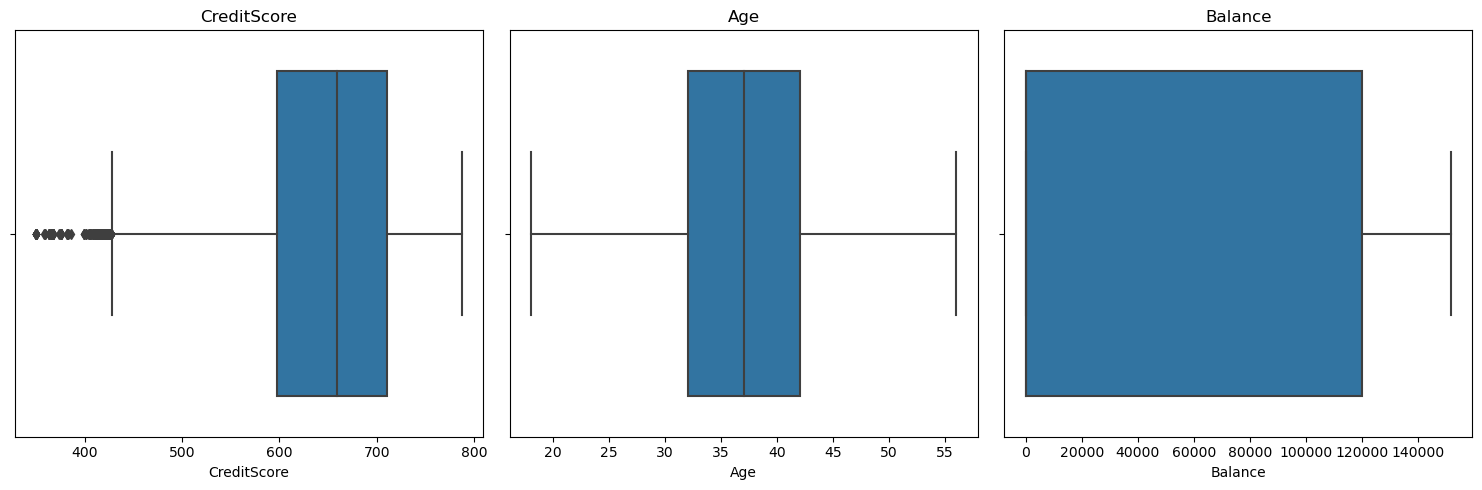

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot for CreditScore
sns.boxplot(x=df['CreditScore'], ax=axes[0])
axes[0].set_title('CreditScore')

# Box plot for Age
sns.boxplot(x=df['Age'], ax=axes[1])
axes[1].set_title('Age')

# Box plot for Balance
sns.boxplot(x=df['Balance'], ax=axes[2])
axes[2].set_title('Balance')

# Display the plot
plt.tight_layout()
plt.show()

### Univariate Analysis

**Class Balance** of Targetd Variable

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64


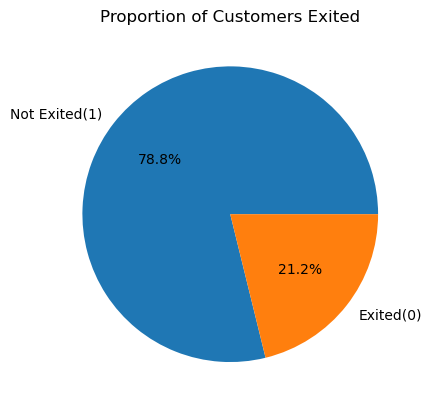

In [13]:
balance = df['Exited'].value_counts(normalize = True)
print(balance)

colors = ['#1f77b4', '#ff7f0e']

labels = ["Not Exited(1)", 'Exited(0)']
plt.pie([balance[0],balance[1]], labels = labels,colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Customers Exited')
plt.show()

**Inferences**:<br>
The dataset is imbalance

**Uniques**

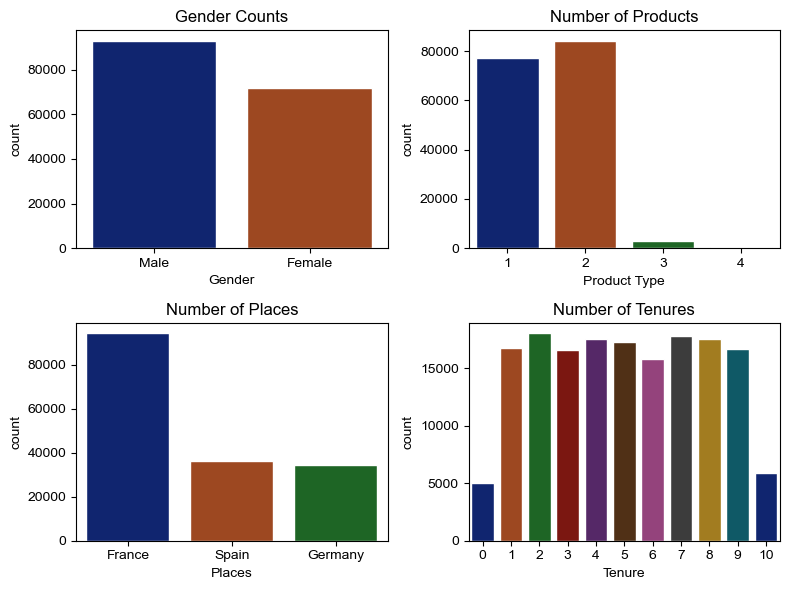

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_palette("dark")

# 'Gender'
sns.countplot(x='Gender', data=df, ax=axes[0,0])
axes[0,0].set_title('Gender Counts')
axes[0,0].set_xlabel('Gender')

# 'NumOfProducts'
sns.countplot(x='NumOfProducts', data=df, ax=axes[0,1])
axes[0,1].set_title('Number of Products')
axes[0,1].set_xlabel('Product Type')

# 'Tenure'
sns.countplot(x='Tenure', data=df, palette='dark', ax=axes[1,1])
axes[1,1].set_title('Number of Tenures')
axes[1,1].set_xlabel('Tenure')

# 'Geography'
sns.countplot(x='Geography', data=df, ax=axes[1,0])
axes[1,0].set_title('Number of Places')
axes[1,0].set_xlabel('Places')

plt.tight_layout()
plt.show()

**Insights**

* Male members are slightly more than Female ones. 
* Mostly members use between 1 and 2 bank products.
* France has the most users, followed by Spain and then Germany.
* The majority of users have joined within the past two years.

### Bivariate Analysis

Relationship between **Numerical Variable** and **Target Variable** 'Exited'

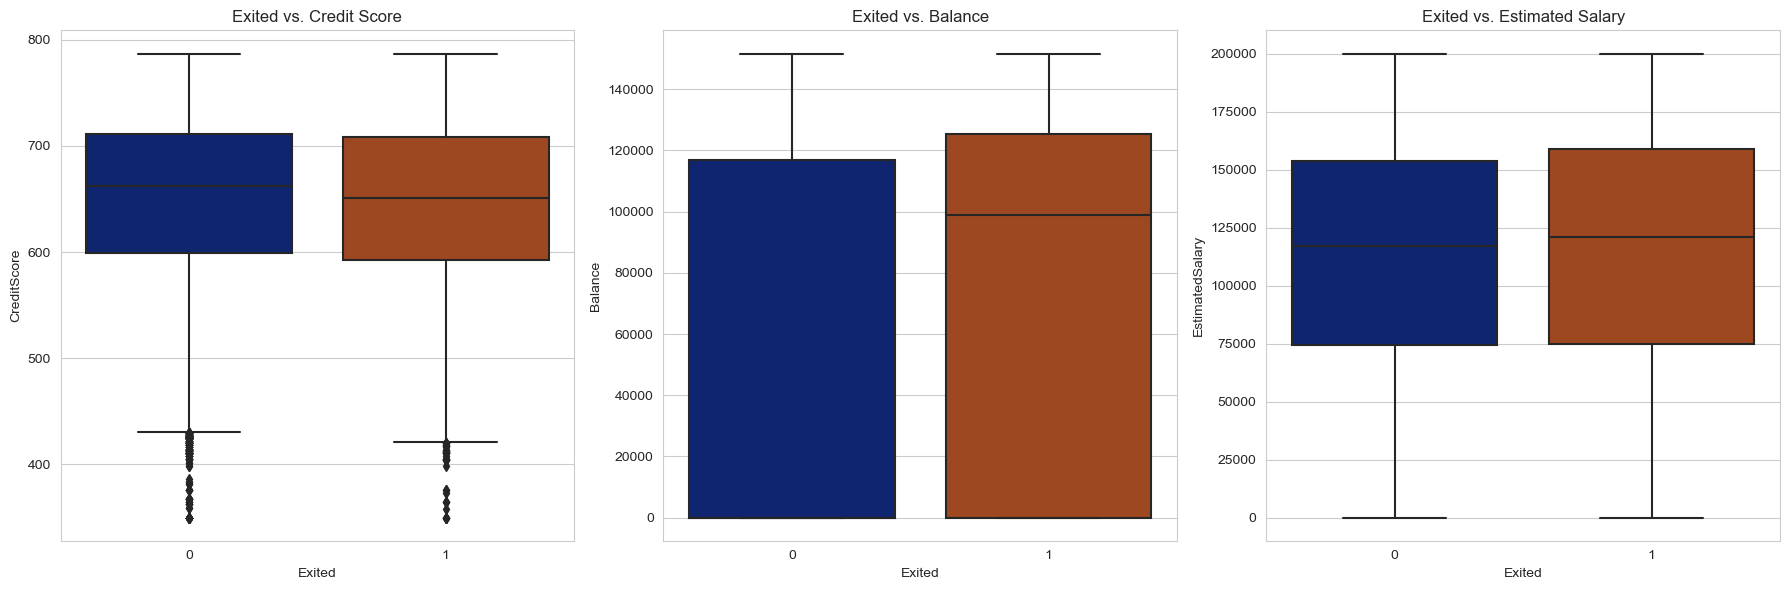

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Credit Score vs. 'Exited'
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axes[0])
axes[0].set_title('Exited vs. Credit Score')

# Balance vs. 'Exited'
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1])
axes[1].set_title('Exited vs. Balance')

# Estimated Salary vs. 'Exited'
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[2])
axes[2].set_title('Exited vs. Estimated Salary')

plt.tight_layout()
plt.show()

**Inferences** :
* **Higher Credit Score** doesn't gaurantee loyalty 
* **Larger A/C Balance** may make them feel free to switch the bank
* **High Income** may increase more opportunity  <br>
Overall, these might become the reasons for the customer to churn

Relationship between **Categorical Variable** and **Target Variable** 'Exited'

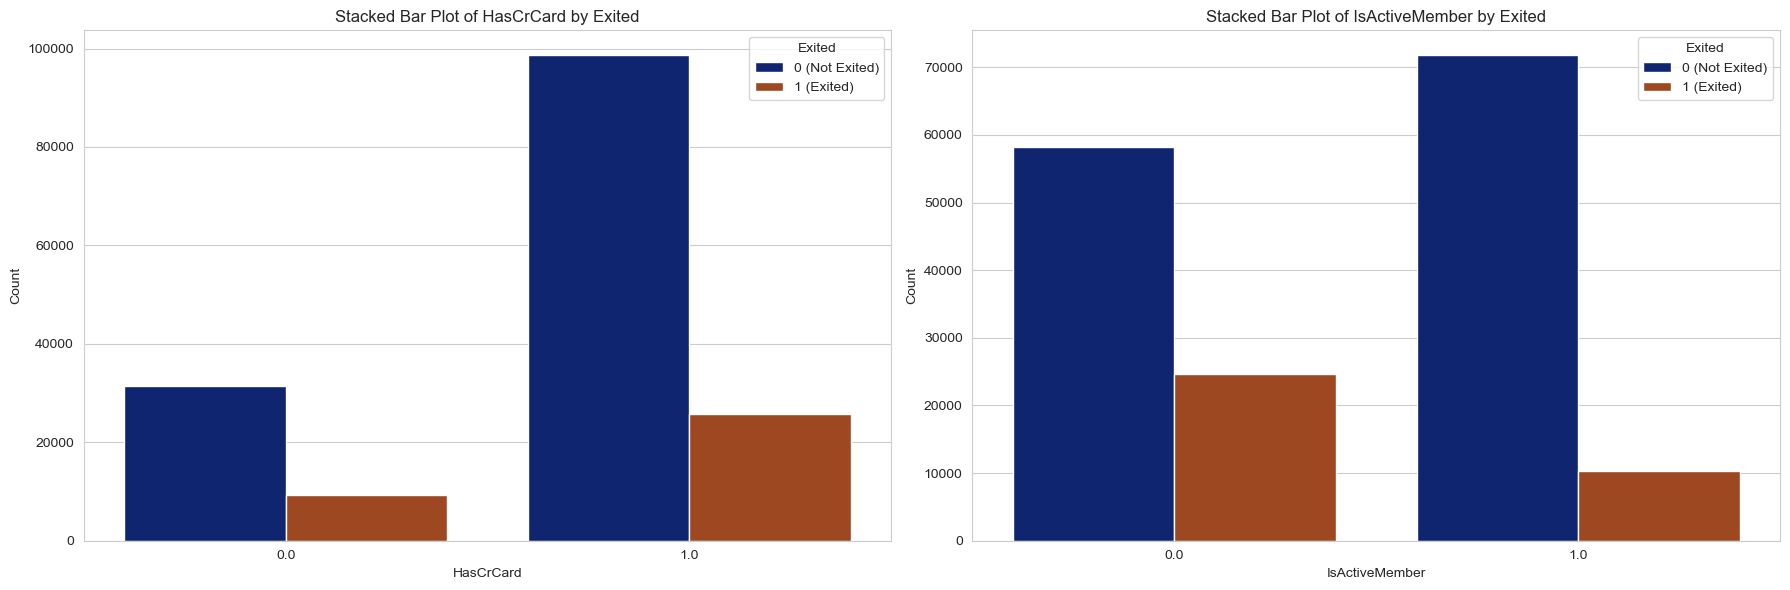

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# HasCrCard vs. 'Exited'
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axes[0])
axes[0].set_title('Stacked Bar Plot of HasCrCard by Exited')
axes[0].set_xlabel('HasCrCard')
axes[0].set_ylabel('Count')
axes[0].legend(title='Exited', labels=['0 (Not Exited)', '1 (Exited)'])

# IsActiveMember vs. 'Exited'
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axes[1])
axes[1].set_title('Stacked Bar Plot of IsActiveMember by Exited')
axes[1].set_xlabel('IsActiveMember')
axes[1].set_ylabel('Count')
axes[1].legend(title='Exited', labels=['0 (Not Exited)', '1 (Exited)'])

plt.tight_layout()
plt.show()

**Inferences**:
* People having credit card are more likely to churn 
* Members who are less active are churning 

Exploring Customer Churn: **Age, Gender and Tenure** Analysis

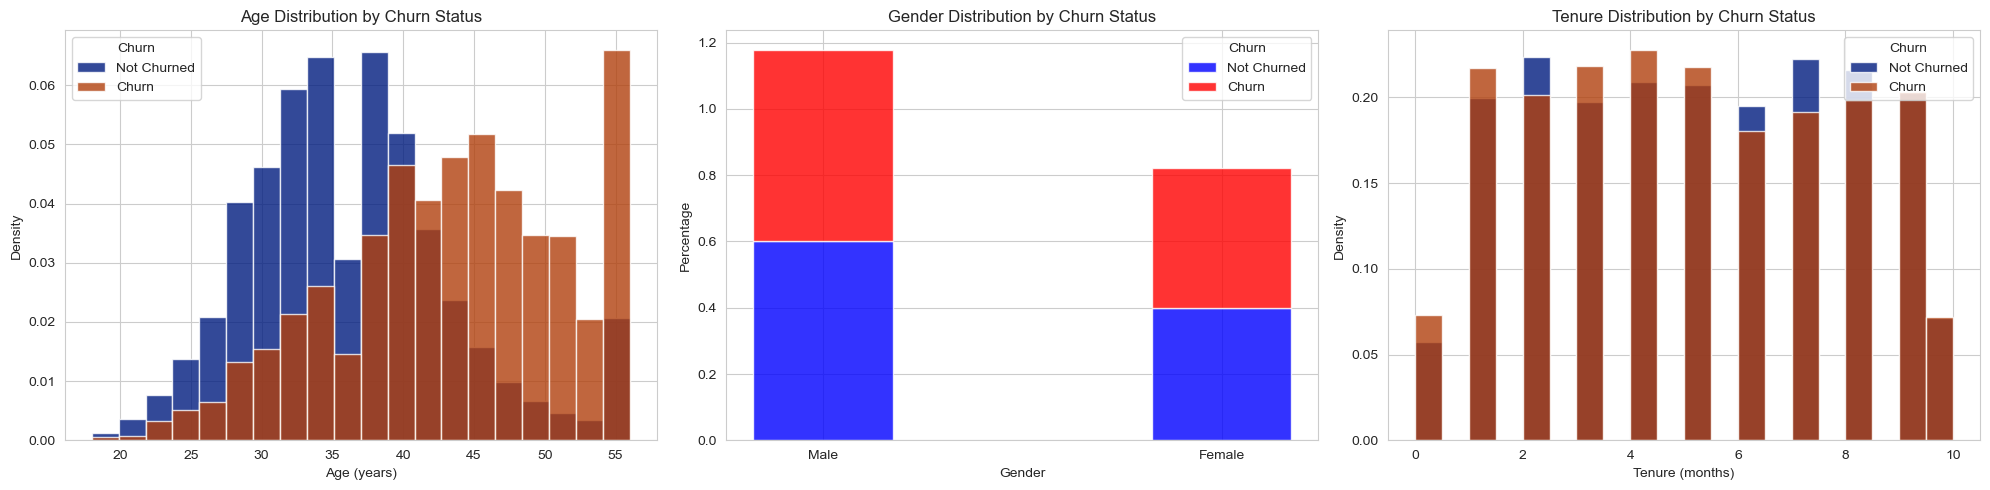

In [17]:
plt.figure(figsize=(20, 5)) 

# Age Distribution
plt.subplot(1, 3, 1)
plt.hist(df[df['Exited'] == 0]['Age'], bins=20, alpha=0.8, density=True, label='Not Churned')
plt.hist(df[df['Exited'] == 1]['Age'], bins=20, alpha=0.8, density=True, label='Churn')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution by Churn Status')
plt.legend(title='Churn')

# Gender Distribution
plt.subplot(1, 3, 2)
active_gender_counts = df[df['Exited'] == 0]['Gender'].value_counts(normalize=True)
exited_gender_counts = df[df['Exited'] == 1]['Gender'].value_counts(normalize=True)
bar_width = 0.35
x = range(len(active_gender_counts))
plt.bar(x, active_gender_counts, width=bar_width, color='blue', alpha=0.8, label='Not Churned')
plt.bar(x, exited_gender_counts, width=bar_width, color='red', alpha=0.8, label='Churn', bottom=active_gender_counts)
plt.xticks(x, active_gender_counts.index)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution by Churn Status')
plt.legend(title='Churn')

# Tenure Distribution
plt.subplot(1, 3, 3)
plt.hist(df[df['Exited'] == 0]['Tenure'], bins=20, alpha=0.8, density=True, label='Not Churned')
plt.hist(df[df['Exited'] == 1]['Tenure'], bins=20, alpha=0.8, density=True, label='Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.title('Tenure Distribution by Churn Status')
plt.legend(title='Churn')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Inferences** :
* Age Range with Max Churn Rate is 50 to 60
* female churn rate is high as compared to male churn rate
* Tenure churn rate is maximum in range 0 to  2 years

### Multivariate Analysis

**Checking Collinearity**

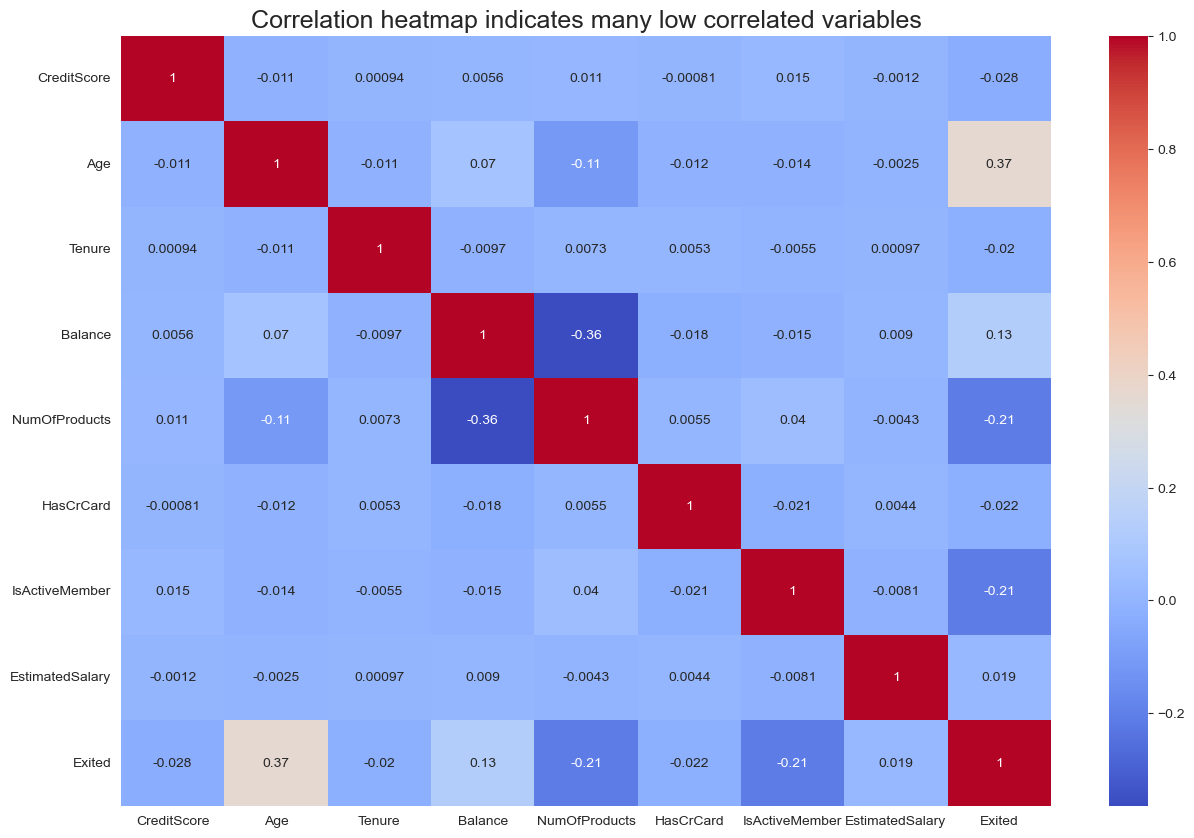

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only = True), annot=True,  cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

**Insight**:<br>
If there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7, these variables are strongly multicollinear. <br>
Hence, it is not multicollinear.

## Data Preprocessing

Converting categorical variables into numerical representations

**Gender** - Male & Female

In [19]:
#replacing values - binary function
df['Gender2'] = np.where(df['Gender']=='Male', 1, 0) 
df[['Gender', 'Gender2']].tail()

,Gender,Gender2
id,,
165029,Female,0
165030,Male,1
165031,Male,1
165032,Female,0
165033,Male,1


**Geography**

In [20]:
#OneHotEncoding 
df= pd.get_dummies(df, columns=['Geography'])  
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender2,Geography_France,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,,,
0,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,True,False,False
1,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,True,False,False
2,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,True,False,False
3,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,True,False,False
4,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,False,False,True


In [21]:
df[['Geography_France', 'Geography_Germany', 'Geography_Spain']] = df[['Geography_France', 'Geography_Germany', 'Geography_Spain']].applymap(lambda x: 1 if x == True else 0)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender2,Geography_France,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,,,
0,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,1,0,0
1,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,1,0,0
2,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,1,0,0
3,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,1,0,0
4,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,0,0,1


## Model Builing 

### Deciding Variables

In [22]:
X= df.drop(['Gender','Exited'], axis=1) #Independent Variables
y= df['Exited']                         #Dependent Variable

### Spliting the data

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=42, stratify=y)

**Standard Scaling**: To normalize values 

In [24]:
scaler= StandardScaler()
scaler

StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Model Building

Will build 3 test model on the algorithms:
* Logistic Regression
* Random Forest
* Gradient Boosting Machine - XGBoost

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

As the dataset is bit **imbalance** so tried techniques to balance and see the results- 
1. normal - without any balancing technique 
2. over-sampling technique
3. under- sampling technique

**Normal- without balancing**

*Model Training and Evaluation*

In [27]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, predictions))
    print("-----------------------------------------------------")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26023
           1       0.71      0.41      0.52      6984

    accuracy                           0.84     33007
   macro avg       0.78      0.68      0.71     33007
weighted avg       0.83      0.84      0.82     33007

-----------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26023
           1       0.72      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

-----------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.73      0.55      0.63      6984

    accurac

In [29]:
predictions_df = pd.DataFrame(predictions)

In [32]:
predictions_df.to_csv('predictions.csv', index=False)

**Inferences**:
* Models:
  - **Logistic Regression**:its **performance lags slightly** behind the others.
  - **Random Forest**: This model offers a **strong balance between precision and recall**. 
  - **XGBoost**: This model **excels at identifying true positives**, making it particularly **valuable for targeting** retention efforts towards **customers most likely to churn**.
* Overall:
  - All models perform well, with **accuracy** ranging from **84% to 86%** but we cannot solely rely on accuracy due to data imbalance.
  - **XGBoost** has the **highest average performance** across **precision, recall, and F1-score**, followed by Random Forest and then Logistic Regression.
  - Identifying **true positives** (churning customers) is crucial, **XGBoost** stands out due to its **higher recall** for the churned class (55%) i.e, it correctly identifies a higher proportion of customers who are actually churning.

**Over-sampling**

In [69]:
sampler = SMOTE(random_state=42)

In [70]:
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

*Model training and Evaluation*

In [71]:
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    # classification report
    print(f"Over-Sampling Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-----------------------------------------------------")

Over-Sampling Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     26023
           1       0.45      0.74      0.56      6984

    accuracy                           0.75     33007
   macro avg       0.68      0.75      0.69     33007
weighted avg       0.82      0.75      0.77     33007

-----------------------------------------------------
Over-Sampling Model: Random Forest
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     26023
           1       0.64      0.63      0.63      6984

    accuracy                           0.84     33007
   macro avg       0.77      0.77      0.77     33007
weighted avg       0.84      0.84      0.84     33007

-----------------------------------------------------
Over-Sampling Model: XGBoost
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     26023
           1       0.68 

**Inferences**:
* Model:
  - **Logistic Regression**: While it has the **lowest F1-score**, **highest precision** for identifying **non-churners(0)** and **recall for churners(1) is lower** than the other models i.e., correctly identifying non-churners and identifies a smaller proportion of churners.
  - **Random Forest**: **Good recall** but **slightly lower precision**.
  - **XGBoost**: This model **maintains its lead** from the previous analysis, **excelling** in both **precision and recall** for **identifying churners**. Its **balanced performance** makes it a strong choice for **retaining churners**.

* Overall Performance:
  - Over-sampling has **improved the performance of all models**, especially for the minority class (churners). This is evident from the **increased recall** scores compared to the previous results without over-sampling.
  - **XGBoost** remains the **best performer** overall, with the **highest F1-score** indicating a good balance between precision and recall.
  - **Random Forest** follows **closely with an F1-score**, while **Logistic Regression has the lowest F1-score** but the **highest precision** for identifying **non-churners**.

**Under-sampling**

In [72]:
under_sampler = RandomUnderSampler(random_state=42)

In [73]:
X_under_sampled, y_under_sampled = under_sampler.fit_resample(X_train, y_train)

*Model training and Evaluation*

In [74]:
for model_name, model in models.items():
    model.fit(X_under_sampled, y_under_sampled)
    preds = model.predict(X_test)
    # classification report
    print(f"Under-Sampling Model: {model_name}")
    print(classification_report(y_test, preds))
    print("-----------------------------------------------------")

Under-Sampling Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     26023
           1       0.45      0.74      0.56      6984

    accuracy                           0.75     33007
   macro avg       0.68      0.75      0.69     33007
weighted avg       0.82      0.75      0.77     33007

-----------------------------------------------------
Under-Sampling Model: Random Forest
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     26023
           1       0.52      0.78      0.62      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.79      0.74     33007
weighted avg       0.84      0.80      0.81     33007

-----------------------------------------------------
Under-Sampling Model: XGBoost
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26023
           1       0.

**Inferences**:
* Models: 
  - **Logistic Regression** Performance remains nearly **identical** to the **over-sampled** model.
  - **Random Forest** : **Precision** for the churned class **improved slightly** and **Accuracy increased**, but **recall dropped** 
   - **XGBoost**: similar to random forest as slightly **improved precision and accuracy but recall decreased**. 
   
* Overall : 
  - **Under-sampling** might **not be as beneficial** as over-sampling for **identifying churning customers** because **decrease in recall**, which is crucial for retention efforts.

### Final Decision for technique

By analyzing 3 techniques the best performed models were made by **Over-Sampling technique** as -
 * Improved recall for churners - which is crucial for the aim of customer retention 
 * Maintained overall accuracy 
 * Balanced performance for XGBoost shown by F1 score .

### Evaluating the Over-Sampling Models

* Confusion Matrix 

Over-Sampling Model: Logistic Regression
True Positives  5154
True Negatives  19742
False Positives  6281
False negatives  1830
-----------------------------------------------------
Over-Sampling Model: Random Forest
True Positives  5449
True Negatives  20992
False Positives  5031
False negatives  1535
-----------------------------------------------------
Over-Sampling Model: XGBoost
True Positives  5527
True Negatives  21096
False Positives  4927
False negatives  1457
-----------------------------------------------------


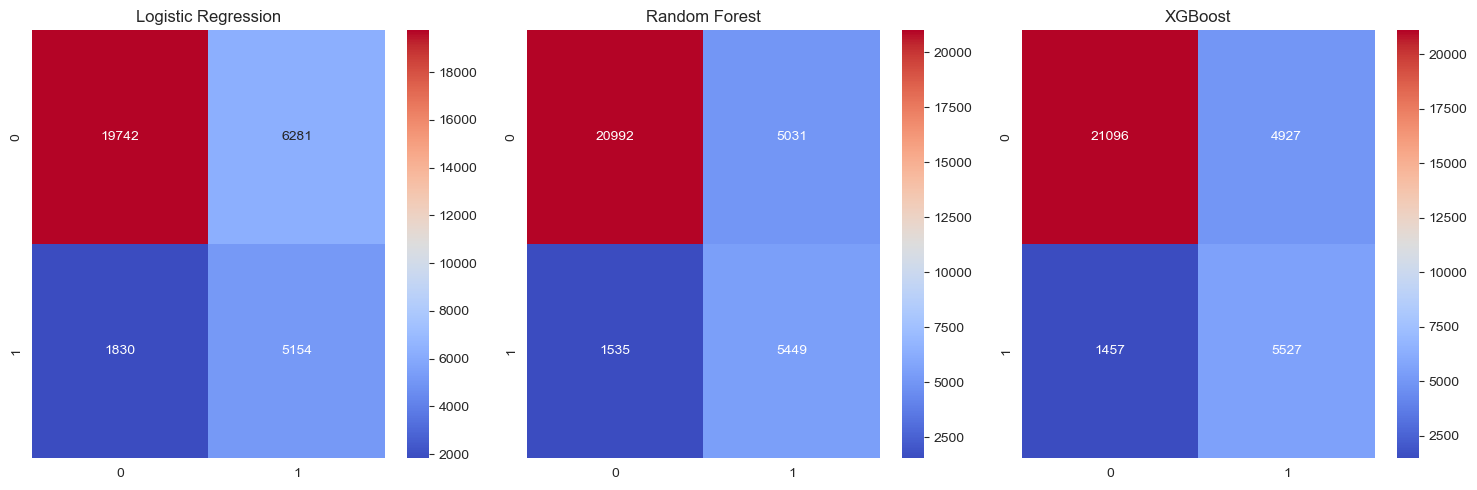

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    print(f"Over-Sampling Model: {model_name}")
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix as heatmap using seaborn
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt="d",cmap='coolwarm', ax=ax)
    ax.set_title(model_name)
    
    tn, fp, fn, tp = cm.ravel()
    print("True Positives ", tp)
    print("True Negatives ", tn)
    print("False Positives ", fp)
    print("False negatives ", fn)
    print("-----------------------------------------------------")

plt.tight_layout()
plt.show()


**Inferences**:
* All three models show an increase in True Positives (TP) indicating **better identification of churning customers**.
* **increase in False Positives** (FP) across all models, means some **non-churning customers were misclassified**.

* Model-specific:    
  - *Logistic Regression*: Highest FP but lowest TP.
  - *Random Forest*: Higher TP than Logistic Regression and lower FP, but still significant.
  - *XGBoost*: Highest TP and lowest FP, although FP still outnumbers missed churners(FN).
 

* Classification Report 

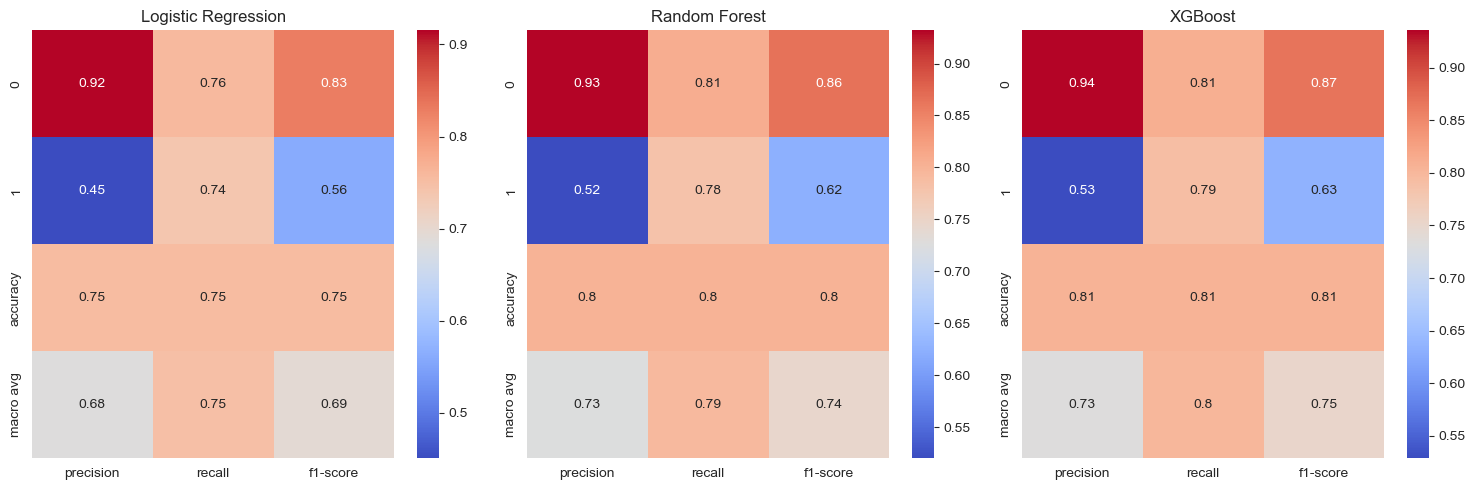

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    ax = axes[idx]
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(model_name)

plt.tight_layout()
plt.show()

### Comparison Table :

|                     | Logistic Regression                        | Random Forest                            | XGBoost                                  |
|:---------------------|:--------------------------------------------|:------------------------------------------|:------------------------------------------|
| True Positives      | 5154                                       | 5449                                     | **5527**                                     |
| True Negatives      | 19742                                      | 20992                                    | **21096**                                    |
| False Positives     | 6281                                       | 5031                                     | **4927**                                     |
| False Negatives     | 1830                                       | 1535                                     | **1457**                                     |
| **Class 0 -**          |                                            |                                          |                                          |
| Precision           | **0.91**                                   | 0.90                                     | 0.90                                     |
| Recall              | **0.76**                                   | 0.90                                     | 0.92                                     |
| F1-Score            | 0.83                                       | 0.90                                     | **0.91**                                     |
| **Class 1 -**           |                                            |                                          |                                          |
| Precision           | **0.45**                                       | 0.64                                     | 0.68                                     |
| Recall              | **0.74**                                       | 0.63                                     | 0.62                                     |
| F1-Score            | 0.56                                       | 0.63                                     | **0.65**                                     |
|                     |                                            |                                          |                                          |
| Accuracy            | 0.75                                       | 0.84                                     | **0.86**                                     |
|                     |                                            |                                          |                                          |
| Strengths           | High precision & recall for non-churners   | High accuracy & recall for non-churners | Balanced performance, good recall for churners |
| Weaknesses          | Lower recall for churners                  | Lower recall for churners                | Lower recall for churners                   |
| Best for            | Minimizing false positives, high precision | Balanced approach, high accuracy & recall | Balanced approach, good recall for churners |


### Selecting Best Model Out of 3 Models
As per Problem Statement : **Maximize retention and prioritize catching every potential churner** <br>
The algorithm that strikes a **balance** between **minimizing false positives** (incorrectly identifying customers as churners) and **maximizing recall** (identifying actual churners) would be preferred

From the **comparison table**, both **Random Forest and XGBoost** demonstrate a **balanced approach, with high accuracy, good precision for non-churners**, and **reasonable recall for churners**. However, XGBoost slightly outperforms Random Forest in terms of recall for churners and overall F1-score.

But considering the objective
#### XGBoost  
could be better as :
   - Recall reflects the proportion of actual churners the model correctly identifies. So, a **higher recall means missing fewer churners**, which aligns with maximizing retention.
     - **Missing a churner** is significantly **more costly** than reaching out to a non-churner who ultimately stays.